# **Heart Attack Prediction with Machine Learning**

## **Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

## **Initial Data Exploration**

In [2]:
df = pd.read_csv('/content/heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
# Determine the number of data poins and number of features
df.shape

(303, 14)

In [4]:
# get the information about the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
# checking for the missing values
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [6]:
# list categorical and numerical features
categorical_features = df.select_dtypes(include=['object']).columns.to_list()
numerical_features = df.select_dtypes(exclude=['object']).columns.to_list()

print("Categorical Features:",categorical_features)
print("Numerical Features:",numerical_features)

Categorical Features: []
Numerical Features: ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']


In [7]:
# Descriptive statistics of the data set
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [8]:
df['output'].value_counts(normalize=True)*100

output
1    54.455446
0    45.544554
Name: proportion, dtype: float64

The classes in this dataset are balanced.

There are 54.45% of the patients have a higher risk of heart disease, while 45.54% of the patients have a lower risk of heart disease.

## **Exploratory Data Analysis (EDA)**

In [9]:
sns.set()

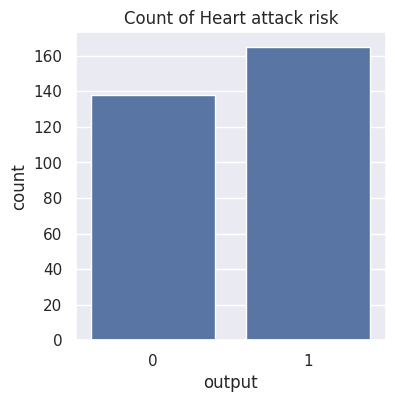

In [10]:
plt.figure(figsize=(4,4))
sns.countplot(x=df.output)
plt.title('Count of Heart attack risk')
plt.show()

Text(0.5, 1.0, 'Distribution of age')

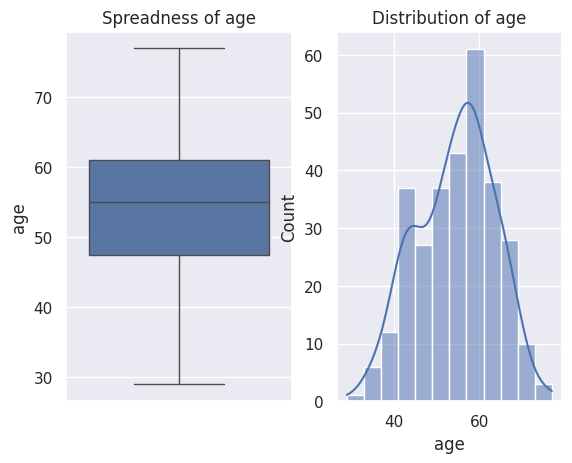

In [11]:
plt.subplot(1,2,1)
sns.boxplot(y=df['age'])
plt.title('Spreadness of age')


plt.subplot(1,2,2)
sns.histplot(x=df['age'], kde=True)
plt.title('Distribution of age')



*   Patients in this data set mostly in between 48 and 61 years of age.


*   The age distribution in this data set resembles a normal distribution.



Spreadness age by sex and Risk(Output)

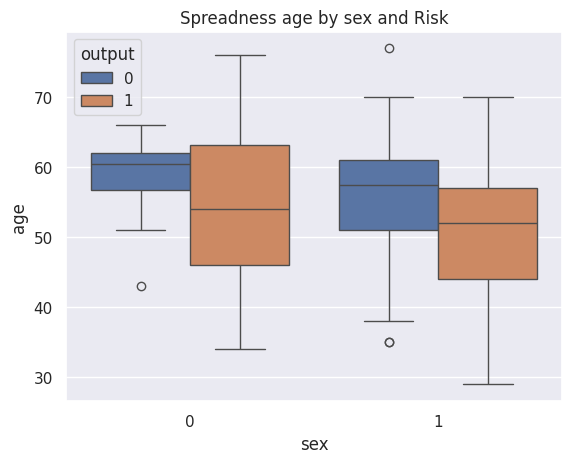

In [12]:
sns.boxplot(x='sex', y='age', data=df, hue='output')
plt.title('Spreadness age by sex and Risk')
plt.show()



*   The age of female patients have high risk of heart disease is more spread out than that of female patients have low risk.

* Male patients have higher risk of heart disease were slightly older than male patients have lower risk.



In [13]:
df.groupby(['sex', 'output']).agg({'output':'count'})

output
sex output        
0   0           24
    1           72
1   0          114
    1           93

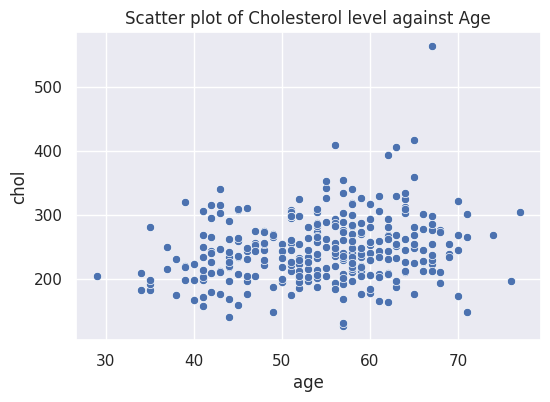

In [14]:
# Scatter plot of the cholestoral level against the age
plt.figure(figsize=(6, 4))
sns.scatterplot(x='age', y='chol', data=df)
plt.title('Scatter plot of Cholesterol level against Age')
plt.show()

Interpretation:

*   The points are randomly distributed across the plot.
*   This suggests that there is no correlation between age and chol.

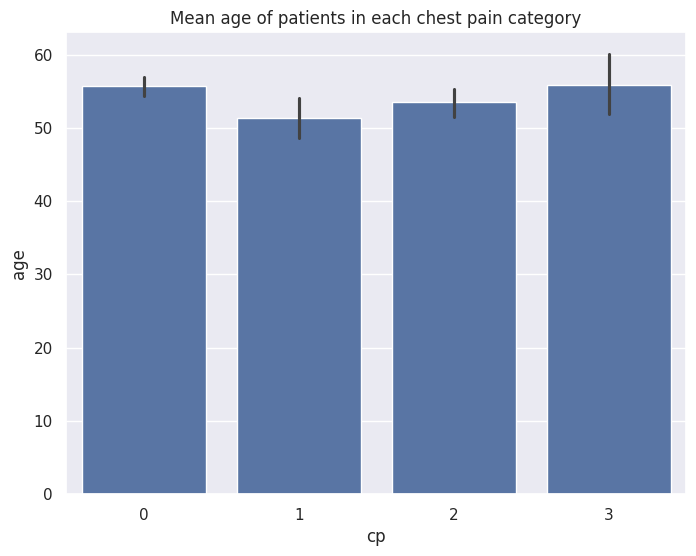

In [15]:
# Bar plot of the mean age of patients in each chest pain category
plt.figure(figsize=(8, 6))
sns.barplot(x='cp', y='age', data=df)
plt.title('Mean age of patients in each chest pain category')
plt.show()



*   The results of the bar plot suggest that chest pain category is not a strong predictor of age. However, age should still be considered when evaluating patients with chest pain.



<Axes: xlabel='output', ylabel='chol'>

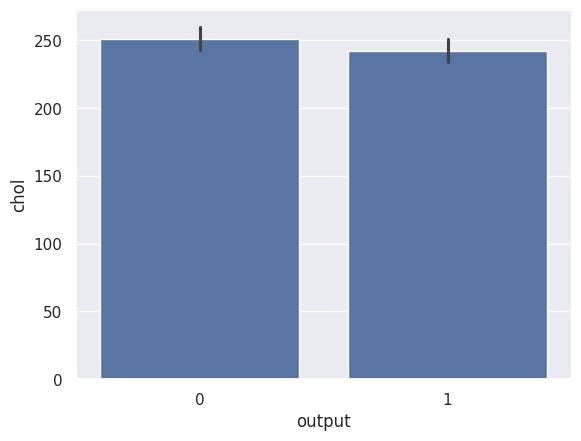

In [16]:
# Bar plot of the mean cholesterol level (chol) for patients in each output category (output).
sns.barplot(x='output',y='chol',data=df)

## **Perform the train-test split**

In [17]:
# Split the DataFrame into features and target
x = df.drop(['output'],axis=1)
y = df['output']

# Perform the train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

## **Perform feature scaling**

In [18]:
# Perform the train-test split
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## **Logistic Regression**

In [19]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr_score = lr.score(x_test, y_test)
ypred_lr = lr.predict(x_test)

print("Logistic Regression Accuracy Score:", lr_score)

Logistic Regression Accuracy Score: 0.8524590163934426


In [20]:
# Compute the confusion matrix for the predictions
c = confusion_matrix(y_test, ypred_lr)
print(c)

[[21  6]
 [ 3 31]]


<Axes: >

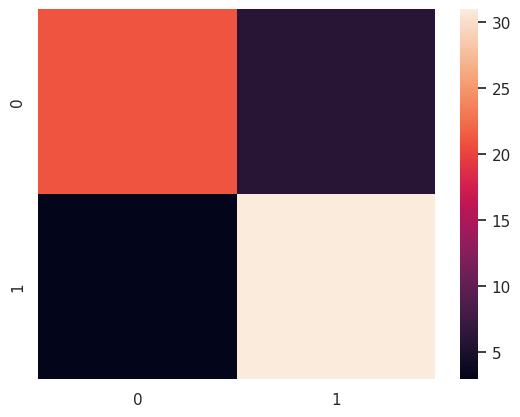

In [21]:
# Create a heatmap of the confusion matrix
sns.heatmap(c)

## **SVC**

In [22]:
sv = SVC()
sv.fit(x_train, y_train)
sv_score = sv.score(x_test, y_test)
sv_predictions = sv.predict(x_test)
print("SVC Accuracy Score:", sv_score)

SVC Accuracy Score: 0.8688524590163934


## **Random Forest Classifier**

In [23]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(x_train, y_train)
rfc_score = rfc.score(x_test, y_test)
rfc_predictions = rfc.predict(x_test)
print("Random Forest Classifier Accuracy Score:", rfc_score)

Random Forest Classifier Accuracy Score: 0.8524590163934426




*   This model can  predict the output for 83.6% of the data points correctly and it has a good performance.




## **K Nearest Neighbors**

In [24]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train, y_train)
kn_score = kn.score(x_test, y_test)
print("K Nearest Neighbours Accuracy Score:", kn_score)

K Nearest Neighbours Accuracy Score: 0.819672131147541


## **Neural network model using TensorFlow**

In [25]:
# Create the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
7/7 [==============================] - 3s 82ms/step - loss: 0.6543 - accuracy: 0.6839 - val_loss: 0.5686 - val_accuracy: 0.8163
Epoch 2/100
7/7 [==============================] - 0s 18ms/step - loss: 0.5490 - accuracy: 0.8394 - val_loss: 0.4923 - val_accuracy: 0.8776
Epoch 3/100
7/7 [==============================] - 0s 23ms/step - loss: 0.4893 - accuracy: 0.8601 - val_loss: 0.4424 - val_accuracy: 0.8776
Epoch 4/100
7/7 [==============================] - 0s 15ms/step - loss: 0.4459 - accuracy: 0.8653 - val_loss: 0.4078 - val_accuracy: 0.8776
Epoch 5/100
7/7 [==============================] - 0s 14ms/step - loss: 0.4119 - accuracy: 0.8705 - val_loss: 0.3805 - val_accuracy: 0.8776
Epoch 6/100
7/7 [==============================] - 0s 17ms/step - loss: 0.3874 - accuracy: 0.8653 - val_loss: 0.3590 - val_accuracy: 0.8776
Epoch 7/100
7/7 [==============================] - 0s 16ms/step - loss: 0.3700 - accuracy: 0.8601 - val_loss: 0.3477 - val_accuracy: 0.8776
Epoch 8/100
7/7 [===

In [26]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {test_accuracy}')

Test Accuracy: 0.8524590134620667


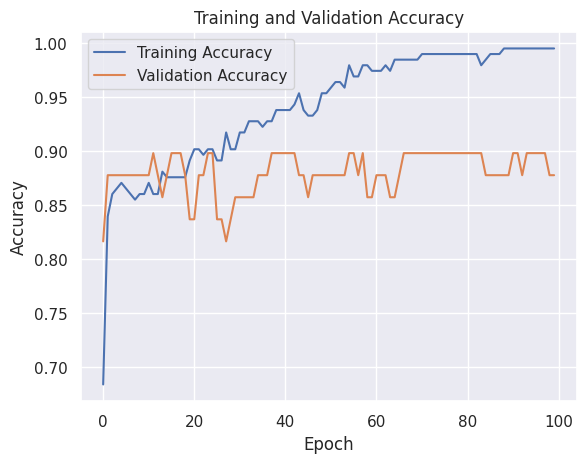

In [27]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [46]:
# Create the neural network model
model = Sequential([
    Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(64, activation='relu'),
    Dropout(0.2),  # Adding dropout for regularization
    Dense(1, activation='sigmoid')
])

# Using Adam optimizer with a lower learning rate
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])


history = model.fit(x_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1,)

Epoch 1/100
4/4 [==============================] - 1s 64ms/step - loss: 0.7627 - accuracy: 0.4249 - val_loss: 0.7166 - val_accuracy: 0.5102
Epoch 2/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6607 - accuracy: 0.6477 - val_loss: 0.6424 - val_accuracy: 0.6939
Epoch 3/100
4/4 [==============================] - 0s 12ms/step - loss: 0.6111 - accuracy: 0.7306 - val_loss: 0.5886 - val_accuracy: 0.7551
Epoch 4/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5659 - accuracy: 0.7617 - val_loss: 0.5516 - val_accuracy: 0.7755
Epoch 5/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5329 - accuracy: 0.7824 - val_loss: 0.5208 - val_accuracy: 0.7755
Epoch 6/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5057 - accuracy: 0.8031 - val_loss: 0.4930 - val_accuracy: 0.7755
Epoch 7/100
4/4 [==============================] - 0s 12ms/step - loss: 0.5007 - accuracy: 0.8083 - val_loss: 0.4719 - val_accuracy: 0.7755
Epoch 8/100
4/4 [===

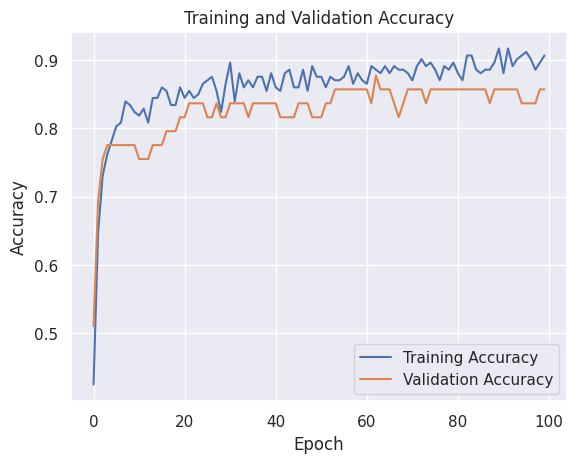

In [47]:
# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [48]:
nn_predictions = model.predict(x_test)

2/2 [==============================] - 0s 6ms/step


In [49]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

2/2 [==============================] - 0s 6ms/step - loss: 0.3362 - accuracy: 0.9016
Test Loss: 0.33619198203086853
Test Accuracy: 0.9016393423080444


## **Visualize the Scores**

In [50]:
scores = {
    'Logistic Regression': lr_score,
    'SVC': sv_score,
    'Random Forest Classifier': rfc_score,
    'K Nearest Neighbors': kn_score,
    'Neural Networks': test_accuracy,
}

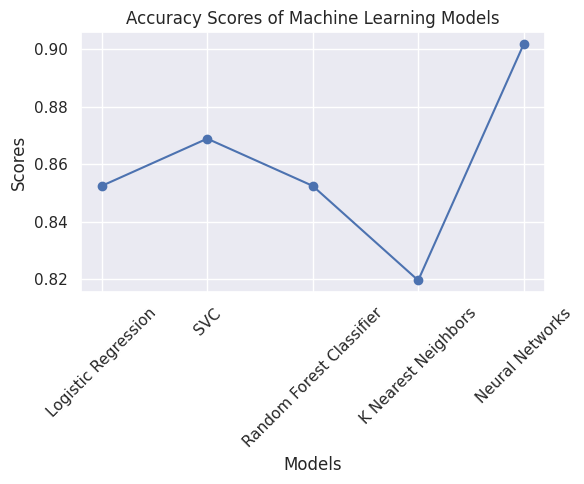

In [52]:
# Plot the scores
plt.figure(figsize=(6, 5))
plt.plot(list(scores.keys()), list(scores.values()), marker='o', linestyle='-')
plt.title('Accuracy Scores of Machine Learning Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()